<a href="https://colab.research.google.com/github/JamshedAli18/Scikit-learn-Algorithms-practice/blob/main/LogisticRegression(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Step 1: Create a large DataFrame with synthetic data
np.random.seed(42)  # For reproducibility

# Simulate data
n_samples = 100000  # Large dataset
age = np.random.randint(18, 70, size=n_samples)  # Age between 18 and 70
income = np.random.randint(20000, 120000, size=n_samples)  # Income between $20k and $120k
product_interest = np.random.rand(n_samples)  # Interest in product (0 to 1 scale)
browsing_time = np.random.randint(1, 30, size=n_samples)  # Browsing time in minutes
previous_purchases = np.random.randint(0, 10, size=n_samples)  # Number of previous purchases

# Target variable: whether the customer purchased the product
# We'll make it more likely that older people with higher income and more interest in the product purchase it
purchased = (age > 30) & (income > 50000) & (product_interest > 0.5)
purchased = purchased.astype(int)  # Convert boolean to 0/1

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Product_Interest': product_interest,
    'Browsing_Time': browsing_time,
    'Previous_Purchases': previous_purchases,
    'Purchased': purchased
})




In [3]:
df.head()

,Age,Income,Product_Interest,Browsing_Time,Previous_Purchases,Purchased
0,56,48339,0.638182,29,5,0
1,69,80673,0.705588,22,1,1
2,46,35320,0.427477,19,8,0
3,32,54228,0.610268,4,7,1
4,60,79914,0.206745,23,2,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2)

In [6]:
df.shape

(100000, 6)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [10]:
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
accuracy = accuracy_score(y_test,y_pred)

In [14]:
accuracy

0.72245

In [23]:
map=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)


array([[14110,   668],
       [ 4883,   339]])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


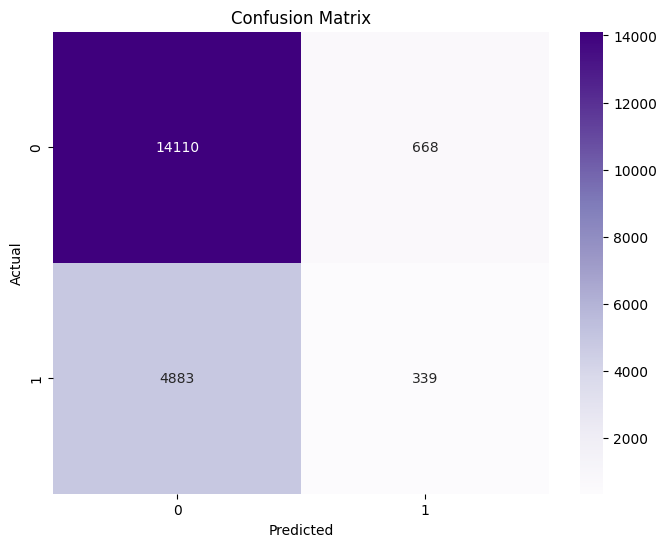

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(map, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()